In [1]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed
# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [2]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species','vdjdb.score', 'meta']]

In [3]:
df['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [4]:
pd.set_option('display.max_colwidth', None)
df[['meta']].head(3)

,meta
0,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:01;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*08:03:2,HLA-DRB*15:01:1"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""065"", ""tissue"": ""PBMC""}"


In [5]:
pd.reset_option('display.max_colwidth')

filtered_df = df[df['complex.id'] == 4]
filtered_df.head(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
 13  meta             92771 non-null  object
dtypes: int64(2), object(12)
memory usage: 9.9+ MB


In [7]:
df.dtypes

complex.id          int64
gene               object
cdr3               object
v.segm             object
j.segm             object
species            object
mhc.a              object
mhc.b              object
mhc.class          object
antigen.epitope    object
antigen.gene       object
antigen.species    object
vdjdb.score         int64
meta               object
dtype: object

In [8]:
df.shape

(92771, 14)

In [9]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(280, 14)

In [10]:
df.count()

complex.id         92771
gene               92771
cdr3               92771
v.segm             92670
j.segm             91626
species            92771
mhc.a              92771
mhc.b              92771
mhc.class          92771
antigen.epitope    92771
antigen.gene       92709
antigen.species    92771
vdjdb.score        92771
meta               92771
dtype: int64

### Dropping duplicate columns

In [11]:
# Drop duplicate rows
df=df.drop_duplicates()
df.shape

(92491, 14)

### Dropping missing and null value

In [12]:
print(df.isnull().sum())

complex.id            0
gene                  0
cdr3                  0
v.segm               99
j.segm             1141
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
meta                  0
dtype: int64


In [13]:
df=df.dropna()
df.shape

(91274, 14)

**After dropping null value**
* Bulleted

In [14]:
print(df.isnull().sum())

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
meta               0
dtype: int64


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

>**## Exploring the data ##**

In [15]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'
filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(3)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
5309,0,TRB,CASSKLASTAGEQYF,TRBV2*01,TRBJ2-7*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*11:01,MHCII,DRFYKTLRAEQASQEV,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
5310,0,TRB,CASSGGQETQYF,TRBV14*01,TRBJ2-5*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,LNKIVRMYSPTSILD,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
5311,0,TRB,CASSWDSNYGYTF,TRBV5-5*01,TRBJ1-2*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,DRFYKTLRAEQASQEV,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


##  TCRDist3

In [16]:
df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

In [17]:
df_dash.head(3)

,subject,epitope,count,v_a_gene,j_a_gene,cdr3_a_aa,cdr3_a_nucseq,v_b_gene,j_b_gene,cdr3_b_aa,cdr3_b_nucseq,clone_id
0,mouse_subject0050,PA,2,TRAV7-3*01,TRAJ33*01,CAVSLDSNYQLIW,tgtgcagtgagcctcgatagcaactatcagttgatctgg,TRBV13-1*01,TRBJ2-3*01,CASSDFDWGGDAETLYF,tgtgccagcagtgatttcgactggggaggggatgcagaaacgctgt...,mouse_tcr0072.clone
1,mouse_subject0050,PA,6,TRAV6D-6*01,TRAJ56*01,CALGDRATGGNNKLTF,tgtgctctgggtgacagggctactggaggcaataataagctgactttt,TRBV29*01,TRBJ1-1*01,CASSPDRGEVFF,tgtgctagcagtccggacaggggtgaagtcttcttt,mouse_tcr0096.clone
2,mouse_subject0050,PA,1,TRAV6D-6*01,TRAJ49*01,CALGSNTGYQNFYF,tgtgctctgggctcgaacacgggttaccagaacttctatttt,TRBV29*01,TRBJ1-5*01,CASTGGGAPLF,tgtgctagcacagggggaggggctccgcttttt,mouse_tcr0276.clone


## Installing tcrdist3 package ##

In [18]:
# pip install tcrdist3
# installing tcrdist3

In [19]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')
# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [20]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [21]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text data frame for tcrdist3

In [22]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'], dtype=object)

In [23]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene']]

In [24]:
df.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef


# Separating data set in to alpha and beta dataframe

In [25]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene','antigen.epitope':'epitope'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene','antigen.epitope':'epitope'})

# df = df.rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})
# df.drop([ 'cdr3', 'v.segm', 'j.segm'], axis=1, inplace=True)
df = pd.concat([df_alpha, df_beta], ignore_index=True)
df

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene,cdr3_b_aa,v_b_gene,j_b_gene
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,NaN,NaN,NaN
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,NaN,NaN,NaN
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,NaN,NaN,NaN
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,NaN,NaN,NaN
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
91269,30590,TRB,NaN,NaN,NaN,HomoSapiens,PQPELPYPQPQL,Gluten,CASSVRSTDTQYF,TRBV7-2*01,TRBJ2-3*01
91270,30591,TRB,NaN,NaN,NaN,HomoSapiens,PQPELPYPQPQL,Gluten,CASSLRYTDTQYF,TRBV7-2*01,TRBJ2-3*01
91271,30592,TRB,NaN,NaN,NaN,HomoSapiens,PQQPFPQPEQPFP,Gluten,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01
91272,30593,TRB,NaN,NaN,NaN,HomoSapiens,PQQPFPQPEQPFP,Gluten,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01


In [26]:
df_alpha.reset_index(drop=True, inplace=True)
df_beta.reset_index(drop=True, inplace=True)
df.reset_index(drop=True,inplace=True)

In [27]:
df_alpha

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef
...,...,...,...,...,...,...,...,...
36910,30590,TRA,CMDEGGSNYKLTF,TRAV26-1*01,TRAJ53*01,HomoSapiens,PQPELPYPQPQL,Gluten
36911,30591,TRA,CSLYNNNDMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,PQPELPYPQPQL,Gluten
36912,30592,TRA,CALSTDSWGKLQF,TRAV6*01,TRAJ24*01,HomoSapiens,PQQPFPQPEQPFP,Gluten
36913,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,PQQPFPQPEQPFP,Gluten


In [28]:
df_alpha['species'].unique()


array(['HomoSapiens', 'MusMusculus'], dtype=object)

# Removing mouse and monkey

In [29]:
df = df[~df['species'].isin(['MusMusculus', 'MacacaMulatta'])]
df_alpha = df_alpha[~df_alpha['species'].isin(['MusMusculus', 'MacacaMulatta'])]
df_beta = df_beta[~df_beta['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [30]:
df_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

In [31]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34669 entries, 0 to 36914
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   complex.id    34669 non-null  int64 
 1   gene          34669 non-null  object
 2   cdr3_a_aa     34669 non-null  object
 3   v_a_gene      34669 non-null  object
 4   j_a_gene      34669 non-null  object
 5   species       34669 non-null  object
 6   epitope       34669 non-null  object
 7   antigen.gene  34669 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.4+ MB


## Dropping null values

In [32]:
df_alpha=df_alpha.dropna()
print(df_alpha.isnull().sum())
df_beta=df_beta.dropna()

complex.id      0
gene            0
cdr3_a_aa       0
v_a_gene        0
j_a_gene        0
species         0
epitope         0
antigen.gene    0
dtype: int64


## Dropping duplicates

In [33]:
df_alpha=df_alpha.drop_duplicates()
df_beta=df_beta.drop_duplicates()
df=df.drop_duplicates()
df.shape

(80377, 11)

## Run TCRDist on alpha gene dataset

In [65]:
from tcrdist.repertoire import TCRrep
# tr_a = TCRrep(cell_df = df_alpha, 
#             organism = 'human', 
#             chains = ['alpha'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances=False)
# tr_a.cpus=2
# tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# print(tr_a.rw_alpha)
tr_b = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_b.cpus=2
tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_b.rw_beta)


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/464 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 1115)	30
  (0, 2331)	36
  (0, 3729)	36
  (0, 3783)	48
  (0, 4914)	48
  (0, 4921)	48
  (0, 4924)	36
  (0, 4945)	48
  (0, 4949)	48
  (0, 5085)	40
  (0, 5086)	48
  (0, 5095)	48
  (0, 5098)	45
  (0, 5100)	39
  (0, 7661)	39
  (0, 7915)	36
  (0, 13147)	48
  (0, 13581)	48
  (0, 18132)	40
  (0, 21378)	48
  (0, 22628)	48
  (0, 24111)	27
  (0, 26013)	48
  (0, 29122)	48
  :	:
  (46391, 21133)	48
  (46391, 22103)	48
  (46391, 23839)	43
  (46391, 24572)	36
  (46391, 25460)	48
  (46391, 25826)	36
  (46391, 26319)	48
  (46391, 26717)	36
  (46391, 27114)	36
  (46391, 27233)	48
  (46391, 27309)	36
  (46391, 27529)	48
  (46391, 27623)	48
  (46391, 27915)	36
  (46391, 28477)	36
  (46391, 30404)	48
  (46391, 31761)	33
  (46391, 34149)	48
  (46391, 34392)	47
  (46391, 34408)	48
  (46391, 37893)	42
  (46391, 39599)	48
  (46391, 40041)	24
  (46391, 40952)	42
  (46391, 46391)	-1


# Calculate Radius part(not done)

In [35]:
# import os
# import numpy as np
# import pandas as pd
# from tcrdist.repertoire import TCRrep
# from tcrdist.sample import _default_sampler
# from tcrdist.background import get_stratified_gene_usage_frequency
# from tcrdist.centers import calc_radii
# from tcrdist.public import _neighbors_sparse_variable_radius, _neighbors_variable_radius
# from tcrdist.public import TCRpublic
# from tcrdist.ecdf import _plot_manuscript_ecdfs
# import matplotlib.pyplot as plt
# from tcrsampler.setup_db import install_all_next_gen;

In [36]:
# install_all_next_gen(dry_run = False)
# df_test = df_beta.query('epitope == "PA"').\
#     reset_index(drop = True)

# tr = TCRrep(cell_df = df_test.copy(), 
#             organism = 'human', 
#             chains = ['beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)
# tr.cpus=2
# ts = _default_sampler(organism = "human", chain = "beta")()
# ts = get_stratified_gene_usage_frequency(ts = ts, replace = True)

In [37]:
# df_vj_background = tr.synthesize_vj_matched_background(ts = ts, chain = 'beta')
# trb = TCRrep(cell_df = df_vj_background.copy(), 
#             organism = 'human', 
#             chains = ['beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)
# tr.cpus = 2
# radii, thresholds, ecdfs = \
#     calc_radii(tr = tr, 
#         tr_bkgd = trb, 
#         chain = 'beta', 
#         ctrl_bkgd = 10**-5, 
#         use_sparse = True, 
#         max_radius=50)
# # tr.clone_df['radius'] = radii
# # tr.clone_df['radius'][tr.clone_df['radius'] > 26] = 26

In [38]:
# tr.clone_df['neighbors'] = _neighbors_variable_radius(
#     pwmat = tr.pw_beta, 
#     radius_list = tr.clone_df['radius'])

# Visualize part

In [39]:
# pip install umap-learn

In [66]:
# since we have the distance matrix which is in high dimension
# we have to lower the dimension

#since the data is in very high dimension, to boost the speed of process
#frist using TruncatedSVD to lower the dimension to 50
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
svd = TruncatedSVD(n_components=50)
alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
beta_reduced = svd.fit_transform(tr_b.rw_beta)
explained_variance_ratio = svd.explained_variance_ratio_
explained_variance_ratio

array([0.29652589, 0.06958602, 0.02313014, 0.01647494, 0.01193202,
       0.01063526, 0.00993489, 0.00939985, 0.00790142, 0.00719399,
       0.00711134, 0.00669786, 0.00616068, 0.00586738, 0.00554964,
       0.00529541, 0.0050054 , 0.00485707, 0.00430404, 0.00400043,
       0.00373802, 0.00363128, 0.00350117, 0.00343287, 0.00336136,
       0.00324085, 0.00324126, 0.00321882, 0.00261462, 0.0025786 ,
       0.00235341, 0.00228965, 0.00224672, 0.00211437, 0.00210193,
       0.00208686, 0.00209644, 0.00203575, 0.00200017, 0.00202508,
       0.00194627, 0.00184211, 0.00172577, 0.00169166, 0.00167854,
       0.00167305, 0.00163628, 0.00162073, 0.001618  , 0.00156583])

In [70]:
#using Tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
A_tsne = tsne.fit_transform(alpha_reduced)
B_tsne = tsne.fit_transform(beta_reduced)
# using UMAP
from umap import UMAP
umap = UMAP(n_components=2, random_state=42)
A_umap = umap.fit_transform(alpha_reduced)
B_umap = umap.fit_transform(beta_reduced)

D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'UMAP Visualization of alpha chain')

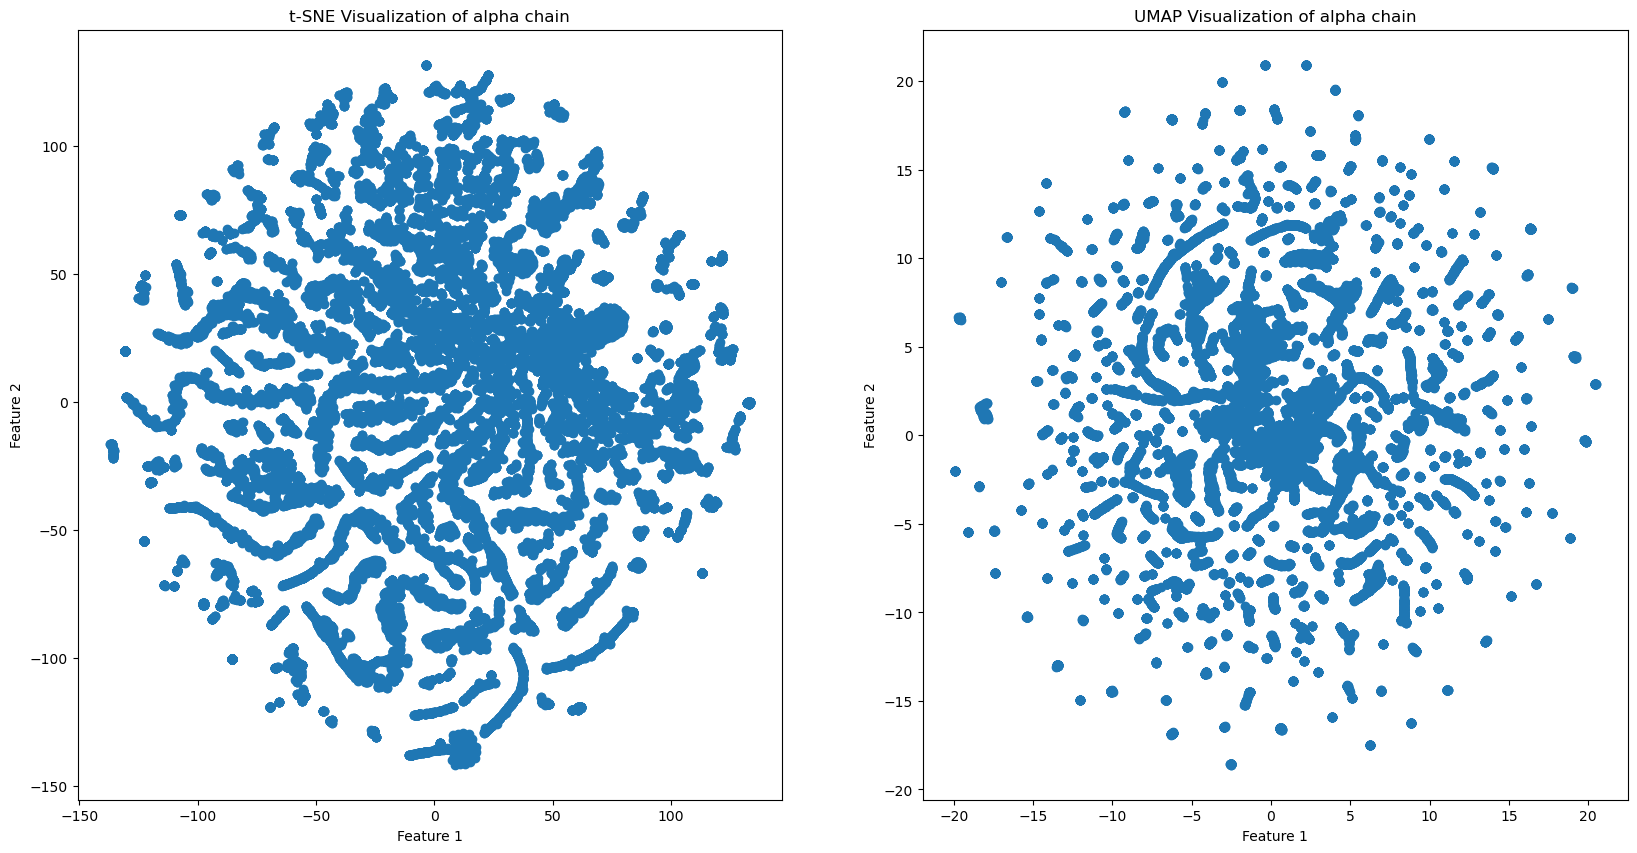

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(A_tsne[:, 0], A_tsne[:, 1])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('t-SNE Visualization of alpha chain')
ax[1].scatter(A_umap[:, 0], A_umap[:, 1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('UMAP Visualization of alpha chain')

Text(0.5, 1.0, 'UMAP Visualization of beta chain')

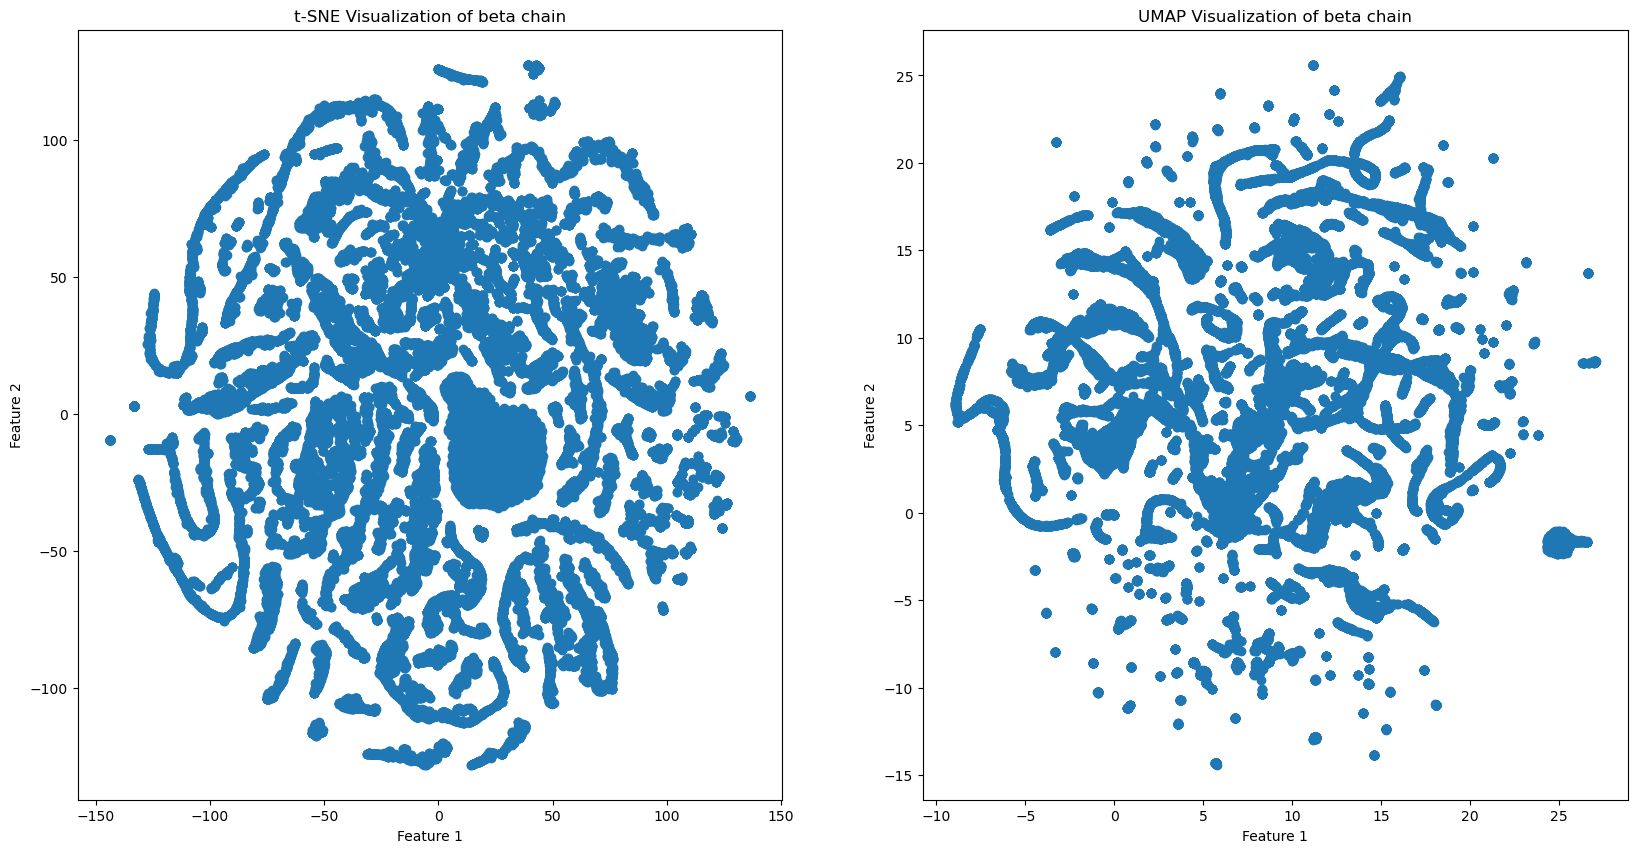

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(B_tsne[:, 0], B_tsne[:, 1])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('t-SNE Visualization of beta chain')
ax[1].scatter(B_umap[:, 0], B_umap[:, 1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('UMAP Visualization of beta chain')

In [64]:
# from the comparison of the two pictures,clearly the TSNE method are more likely to shows more defined clusters
# based on our dataset specificity,so we choose TSNE to cluster seperation clearluy

SyntaxError: invalid syntax (4174231823.py, line 1)